In [ ]:
#Importing all library

import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [ ]:
#install split-folders
!pip install split-folders

In [ ]:
#Extracting The Zip File

local_zip = "archive 2.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
try : 
  os.mkdir('data')
except OSError as error:
  pass
zip_ref.extractall('/content/data')
zip_ref.close()

In [ ]:
# For Deleting the unnecessary folder
shutil.rmtree('data/__MACOSX')

In [ ]:
# shutil.rmtree('data_splitted')

In [ ]:
#Split The Folder
import splitfolders
splitfolders.ratio('/content/data/archive', output='/content/data_splitted', seed=1337, ratio=(.9, .1))

Copying files: 746 files [00:00, 1746.78 files/s]


In [ ]:
#Selecting which one is the train dir and validation dir
base_dir = "/content/data_splitted"
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
#Training
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['acc'])

In [ ]:
#Setting the augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range = 40,
    # width_shift_range = 0.2,
    # height_shift_range = 0.2,
    # shear_range = 0.2,
    # zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 10,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size = 10,
                                                              class_mode='binary',
                                                              target_size = (150, 150))

Found 671 images belonging to 2 classes.
Found 75 images belonging to 2 classes.


In [ ]:
#Train the model
history = model.fit(train_generator,
                    epochs=100,
                    verbose = 1,
                    validation_data = validation_generator)

Epoch 1/100
68/68 [==============================] - 10s 117ms/step - loss: 0.7245 - acc: 0.5574 - val_loss: 0.6510 - val_acc: 0.6533
Epoch 2/100
68/68 [==============================] - 8s 110ms/step - loss: 0.6221 - acc: 0.6438 - val_loss: 0.6575 - val_acc: 0.6133
Epoch 3/100
68/68 [==============================] - 8s 111ms/step - loss: 0.6072 - acc: 0.6542 - val_loss: 0.6545 - val_acc: 0.6133
Epoch 4/100
68/68 [==============================] - 8s 112ms/step - loss: 0.5779 - acc: 0.6945 - val_loss: 0.6230 - val_acc: 0.6400
Epoch 5/100
68/68 [==============================] - 8s 112ms/step - loss: 0.5677 - acc: 0.6841 - val_loss: 0.5743 - val_acc: 0.7333
Epoch 6/100
68/68 [==============================] - 8s 112ms/step - loss: 0.5395 - acc: 0.7273 - val_loss: 0.5673 - val_acc: 0.7333
Epoch 7/100
68/68 [==============================] - 8s 113ms/step - loss: 0.5623 - acc: 0.6960 - val_loss: 0.5549 - val_acc: 0.7200
Epoch 8/100
68/68 [==============================] - 8s 113ms/step -

<Figure size 432x288 with 0 Axes>

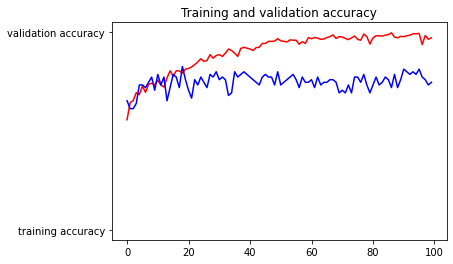

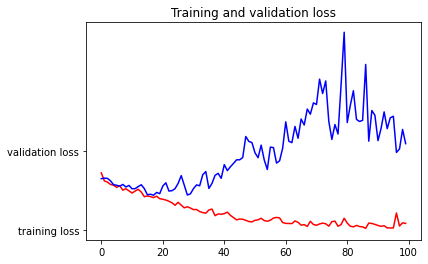

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot The Loss and Accuracy
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#Training and validation accuracy plot
plt.plot(epochs, acc, 'r', 'training accuracy')
plt.plot(epochs, val_acc, 'b', 'validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()

#Training and validation loss
plt.plot(epochs, loss, 'r', 'training loss')
plt.plot(epochs, val_loss, 'b', 'validation loss')
plt.title("Training and validation loss")
plt.figure()

[[0.]]


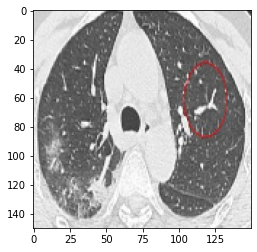

In [ ]:
#Testing the result

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#Predicting Images

img = image.load_img('data_splitted/train/CT_COVID/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89%0.png', target_size=(150, 150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print(classes)

In [ ]:
# Save the model weights
model.save_weights('saved_model/')

In [ ]:
# Buat folder dulu

try:
  os.mkdir('jsonnya')
except OSError as error:
  pass

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 77 kB 2.3 MB/s 


In [ ]:
import time
saved_model_path = "./jsonnya/{}.h5".format(int(time.time()))

model.save(saved_model_path)

In [ ]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./jsonnya

In [ ]:
### This block of code is to make a folder into a zip file

#Making a zip file
from zipfile import ZipFile
import os
from os.path import basename
# create a ZipFile object
with ZipFile('jsonnya.zip', 'w') as zipObj:
   # Iterate over all the files in directory
   for folderName, subfolders, filenames in os.walk('jsonnya'):
       for filename in filenames:
           #create complete filepath of file in directory
           filePath = os.path.join(folderName, filename)
           # Add file to zip
           zipObj.write(filePath, basename(filePath))